## EMPLOYEE ATTRITION PREDICTION

In [4]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import binarize
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix






In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from scipy import stats
from matplotlib import rc
import collections

In [7]:
data = pd.read_csv('EAP_EXP_DATASET.csv')



In [8]:
data.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
data.shape

(14999, 10)

In [10]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Now,I mention the columns in the dataset and they are:
    
    1.satisfaction_level
    2.last_evaluation
    3.number_of_projects
    4.average_monthly_hours
    5.years_at_company
    6.work_accident
    7.left
    8.promotion_last_5years
    9.department
    10.salary

This dataset consists of 15000 rows and 10 columns.    

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_of_projects     14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   years_at_company       14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [14]:
data_left_1=data[data['left']==1]

In [15]:
data_left_1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
data_left_1.shape

(3571, 10)

In [17]:
data.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612809,0.716067,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248673,0.171261,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.000000,0.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [18]:
data_left_1 = data[data['left']==1]
data_left_1.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.439994,0.717967,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.264034,0.198011,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.000000,0.000000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.125000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [19]:
def Histo(data,to_plot):
    for i in range(len(to_plot)):
        plt.hist(data[to_plot[i]])
        plt.axvline(data[to_plot[i]].mean(),color='r')
        plt.xlabel(to_plot[i])
        plt.show()

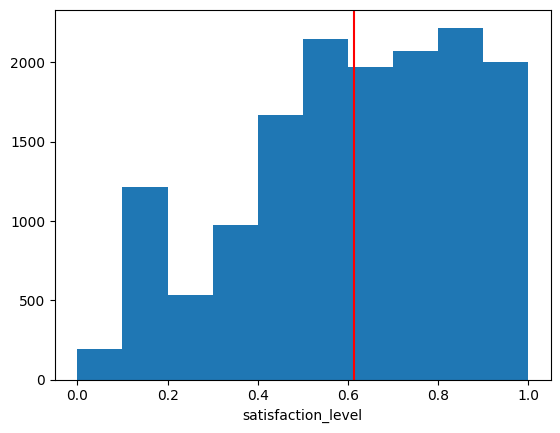

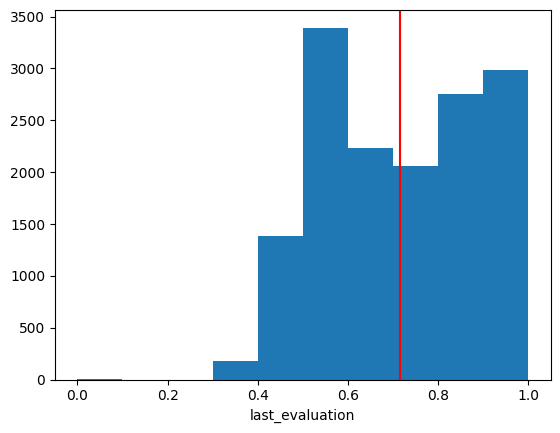

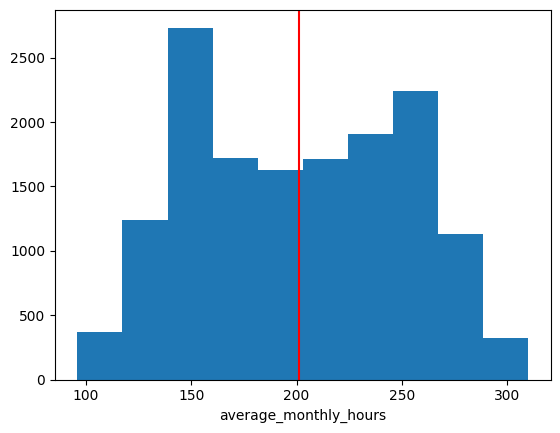

In [20]:
t_plt =['satisfaction_level','last_evaluation','average_monthly_hours']
Histo(data,t_plt)

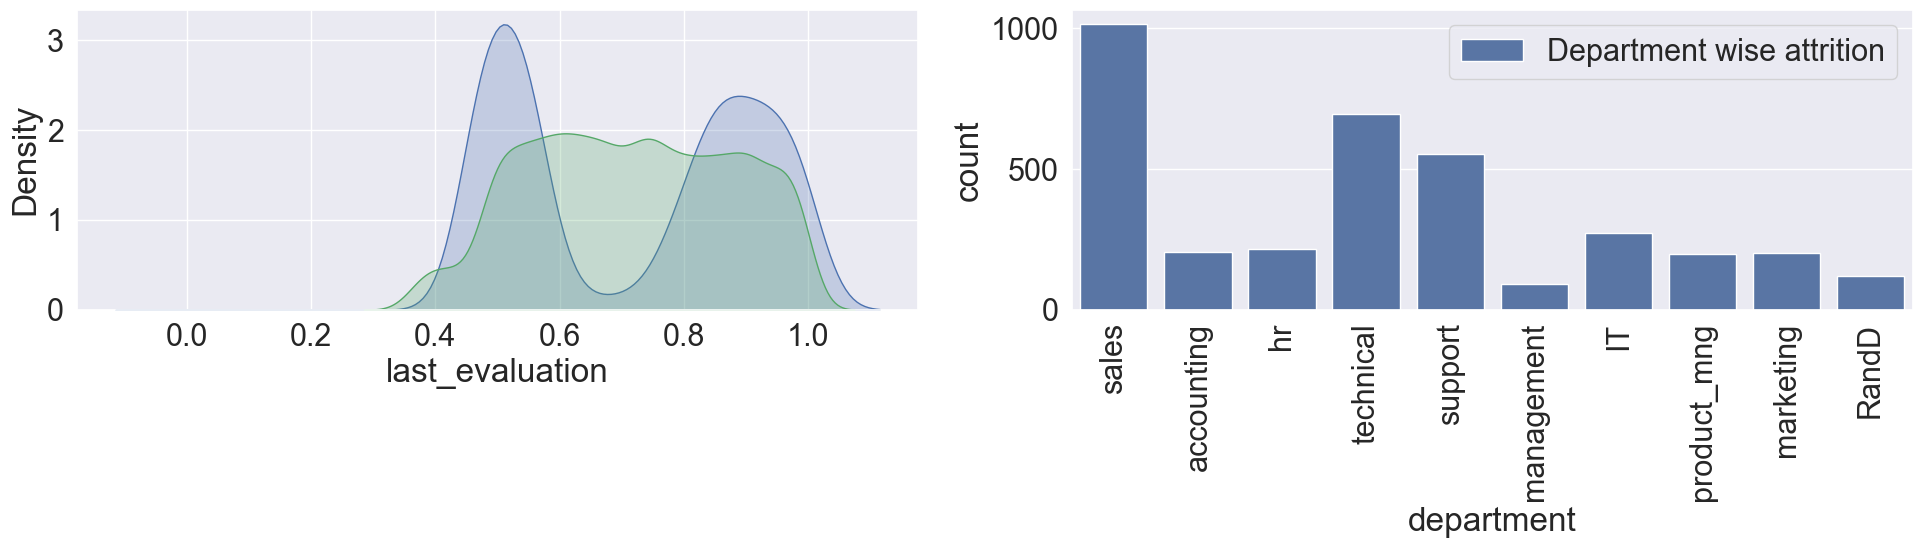

In [21]:
sns.set(font_scale=2)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
asx = data_left_1
sns.kdeplot(data=asx['last_evaluation'],color='b',ax=axs[0],fill=True,label='left')
axs[0].set_xlabel('last_evaluation')
asd = data[data['left']==0]
sns.kdeplot(data=asd['last_evaluation'],color='g',ax=axs[0],fill=True,label='stayed')
sns.countplot(x=asx['department'],ax=axs[1],label='Department wise attrition')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
target_mappers = {'sales':0,'accounting':1,'technical':3,'support':4,'management':5,'IT':6,'product_mng':7,'marketing':8,'RandD':9,'hr':2}
def target_encode(val):
    return target_mappers[val]

data['department'] = data['department'].apply(target_encode)
print(data['department'])

0        0
1        0
2        0
3        0
4        0
        ..
14994    4
14995    4
14996    4
14997    4
14998    0
Name: department, Length: 14999, dtype: int64


In [23]:
lb=LabelEncoder()
data['salary']=lb.fit_transform(data['salary'])

In [24]:
data.corr(method='pearson')

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.105559,-0.142800,-0.019959,-0.100815,0.058728,-0.388486,0.025615,0.015620,0.011807
last_evaluation,0.105559,1.000000,0.349440,0.339733,0.131589,-0.007017,0.006201,-0.008649,0.012196,0.014070
number_of_projects,-0.142800,0.349440,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005715,0.009672
average_monthly_hours,-0.019959,0.339733,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002305,0.007082
years_at_company,-0.100815,0.131589,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001578,-0.003086
work_accident,0.058728,-0.007017,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019253,-0.002506
left,-0.388486,0.006201,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043981,-0.001294
promotion_last_5years,0.025615,-0.008649,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015183,-0.001318
department,0.015620,0.012196,0.005715,-0.002305,-0.001578,0.019253,-0.043981,0.015183,1.000000,-0.010981
salary,0.011807,0.014070,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,-0.010981,1.000000


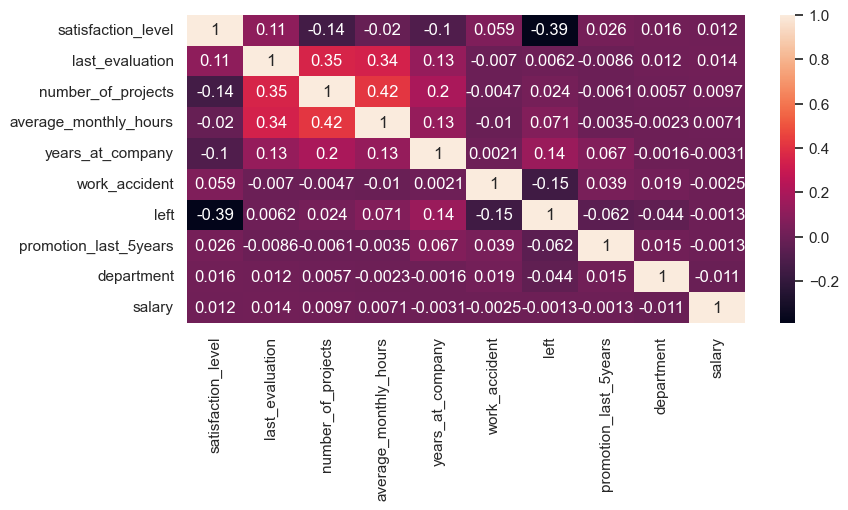

In [25]:

sns.set(font_scale=1)
plt.figure(figsize=(9,4))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=90)
plt.show()

In [26]:
data.corr()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.105559,-0.142800,-0.019959,-0.100815,0.058728,-0.388486,0.025615,0.015620,0.011807
last_evaluation,0.105559,1.000000,0.349440,0.339733,0.131589,-0.007017,0.006201,-0.008649,0.012196,0.014070
number_of_projects,-0.142800,0.349440,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005715,0.009672
average_monthly_hours,-0.019959,0.339733,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002305,0.007082
years_at_company,-0.100815,0.131589,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001578,-0.003086
work_accident,0.058728,-0.007017,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019253,-0.002506
left,-0.388486,0.006201,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043981,-0.001294
promotion_last_5years,0.025615,-0.008649,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015183,-0.001318
department,0.015620,0.012196,0.005715,-0.002305,-0.001578,0.019253,-0.043981,0.015183,1.000000,-0.010981
salary,0.011807,0.014070,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,-0.010981,1.000000


In [27]:
ftr=['number_of_projects','years_at_company','department','work_problems','promotion_last_5years','salary']

In [28]:
ftr

['number_of_projects',
 'years_at_company',
 'department',
 'work_problems',
 'promotion_last_5years',
 'salary']

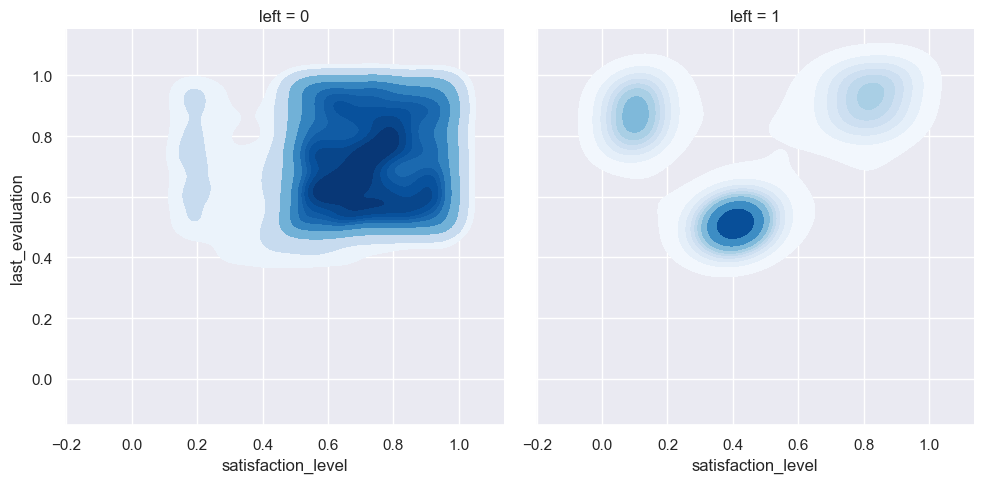

In [32]:
sns.set(color_codes=True)
plot = sns.FacetGrid(data,col='left',hue='left',height=5)
plot.map(sns.kdeplot,'satisfaction_level','last_evaluation',fill=True,cmap='Blues')
plt.show()

## The above plot helps in clear visualization of the target label.Here Left=0 reveals about the employees who has not left the firm.Left=1 reveals about the employees who has left the firm.Here we can find two clusters in the first face grid and three clusters in the second face grid.

In the first face grid:larger cluster denotes the employess who has higher satisfaction_level and last_evaluation and stays in the firm.


In the second face grid,we deal with three types of issues:(deals with the employees who left the firm)

   1.employees with low satisfaction_level and low last_evaluation score.
   
   2.employees with low satisfaction_level and medium last_evaluation_score.
   
   3.employees with high satisfaction level and high last_evaluation score.
   
The firm experiences a heavier loss due lo lost of third type of employees in the second face grid.i.e the employees with higher satisfaction_level and last_evaluation.   

Now lets plot for this third tier of employees whose lose effects the company a lot.

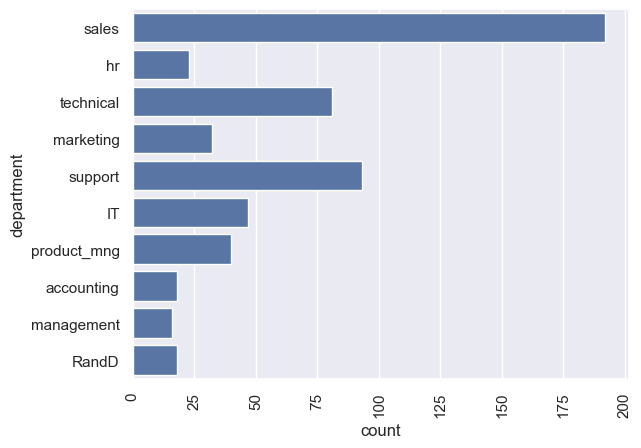

In [33]:
third=data_left_1[[all([a,b]) for a,b in zip(data_left_1['last_evaluation'] > data['last_evaluation'].mean(),data_left_1['satisfaction_level']>data['satisfaction_level'].mean())]]
third_low= third[third['salary']=='low']
sns.countplot(third_low['department'])
plt.xticks(rotation=90)
plt.show()

In [34]:
dept = data['department'].unique()
avgl =[]
avge =[]
avgp =[]
avgh =[]
for i in dept:
    mean = data['satisfaction_level'][data['department']==i].mean()
    avgl.append(mean)       
for i in dept:
    mean = data['last_evaluation'][data['department']==i].mean()
    avge.append(mean)       
for i in dept:
    meap = data['number_of_projects'][data['department']==i].mean()
    avgp.append(mean)
for i in dept:
    mean = data['average_monthly_hours'][data['department']==i].mean()
    avgh.append(mean)

In [36]:
avg=pd.DataFrame({'Dept': dept,'AVGL':avgl,'AVGE':avge,'AVGP':avgp,'AVGH':avgh},index=None)

In [37]:
avg

,Dept,AVGL,AVGE,AVGP,AVGH
0,0,0.614298,0.709546,0.712122,200.900990
1,1,0.582151,0.717718,0.712122,201.162973
2,2,0.598809,0.708850,0.712122,198.684709
3,3,0.607897,0.721099,0.712122,202.497426
4,4,0.618411,0.723200,0.712122,200.777379
5,5,0.621349,0.724000,0.712122,201.249206
6,6,0.618142,0.716830,0.712122,202.215974
7,7,0.619634,0.714756,0.712122,199.965632
8,8,0.618601,0.715886,0.712122,199.385781
9,9,0.619822,0.712122,0.712122,200.800508


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  func(x=x, y=y, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  func(x=x, y=y, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  func(x=x, y=y, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  func(x=x, y=y, **kwargs)


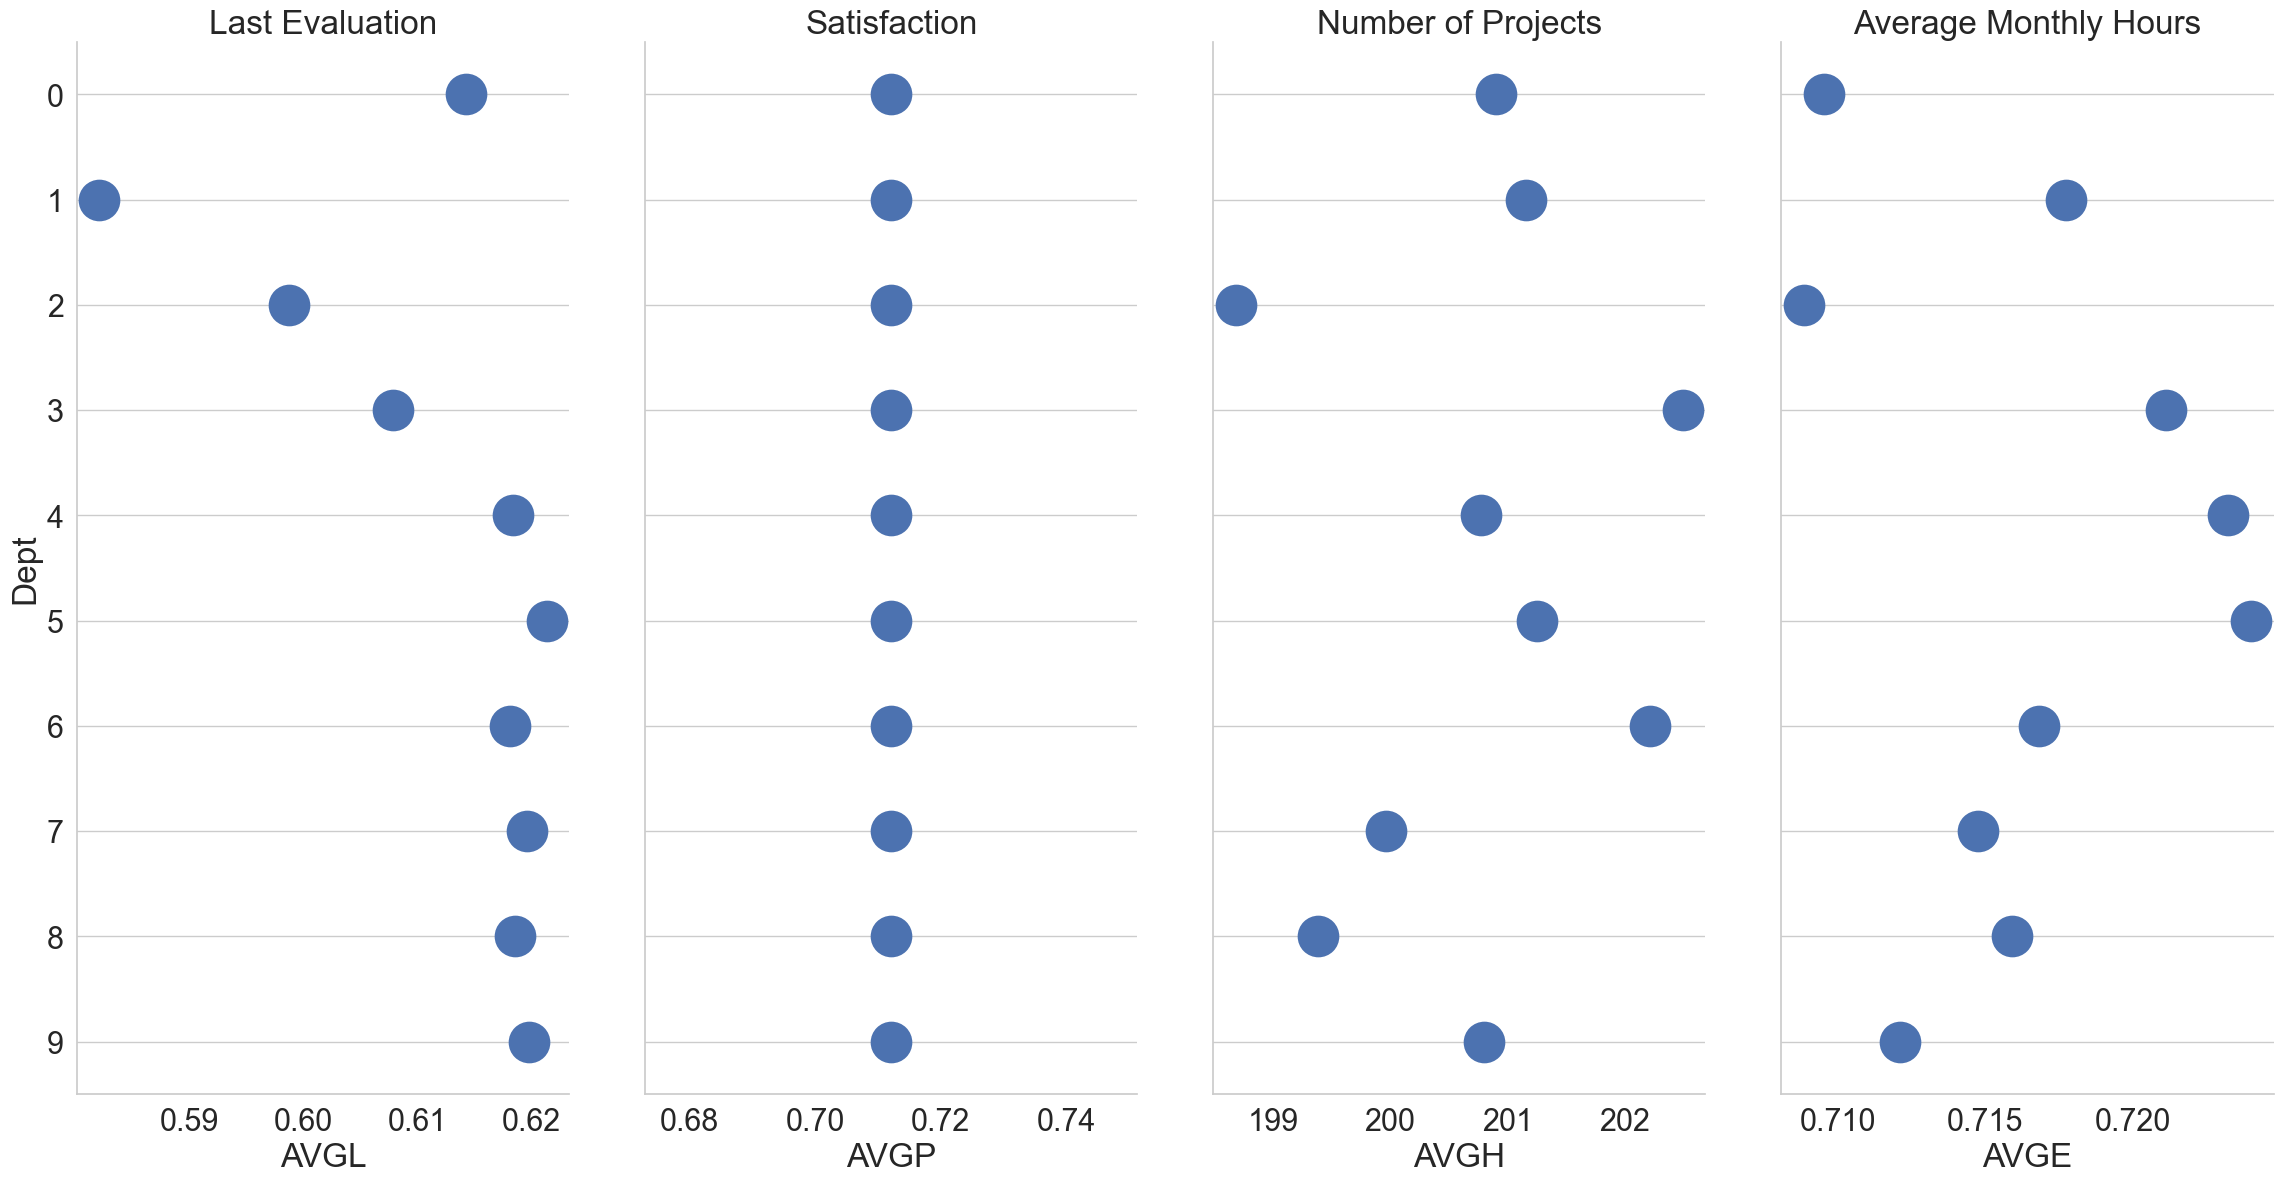

In [38]:
sns.set(style="whitegrid",font_scale=2)
p= sns.PairGrid(avg.sort_values('AVGL',ascending=False),y_vars='Dept',x_vars=['AVGL','AVGP','AVGH','AVGE'],height=12,aspect=0.5)
p.map(sns.stripplot,orient='h',palette="Reds_r", edgecolor="gray",size=30,)
titles = ["Last Evaluation", "Satisfaction", "Number of Projects",'Average Monthly Hours']
plt.title('Department wise performance based on mentioned features')
for a,t in zip(p.axes.flat, titles):

    # Set a different title for each axes
    a.set(title=t)

    # Make the grid horizontal instead of vertical
    a.xaxis.grid(False)
    a.yaxis.grid(True)
plt.show()

## Implementation

Lets dive into the most interesting portion of the project that is to predict the employees who has left the firm with the help of supervised machine learning algorithms.

## Pre-processing the data

Here we clean the data and make it ready for the model to fit and predict.

In [38]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [39]:
features = data.drop(['left'],axis=1)
target= data['left']
lb = LabelEncoder()
features['salary']= lb.fit_transform(features['salary'])
features['department']= lb.fit_transform(features['department'])


In [40]:
print("Department categories:", lb.classes_)


Department categories: [0 1 2 3 4 5 6 7 8 9]


In [41]:
features.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,0,1
1,0.80,0.86,5,262,6,0,0,0,2
2,0.11,0.88,7,272,4,0,0,0,2
3,0.72,0.87,5,223,5,0,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1


In [42]:
features

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,0,1
1,0.80,0.86,5,262,6,0,0,0,2
2,0.11,0.88,7,272,4,0,0,0,2
3,0.72,0.87,5,223,5,0,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,4,1
14995,0.37,0.48,2,160,3,0,0,4,1
14996,0.37,0.53,2,143,3,0,0,4,1
14997,0.11,0.96,6,280,4,0,0,4,1


Now we implement the train_test_split to split the data into testing sets and training sets.

In [43]:


X_train, X_test,y_train,y_test = train_test_split(features,target,test_size=0.4,random_state=2)


In [44]:
X_train.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
1218,0.42,0.56,2,146,3,0,0,9,1
2728,0.55,0.49,3,152,2,0,0,3,2
6464,0.67,0.97,5,239,3,0,0,4,1
11187,0.49,0.91,4,134,4,0,0,1,1
5743,0.95,0.68,5,225,3,0,0,0,2


In [45]:
# scaling process to improve results
from sklearn import preprocessing

Xscale_train = pd.DataFrame(preprocessing.scale(X_train.values))
Xscale_test  = pd.DataFrame(preprocessing.scale(X_test.values))
yscale_train = pd.DataFrame(preprocessing.scale(y_train.values))
yscale_test  = pd.DataFrame(preprocessing.scale(y_test.values))


In [46]:
Xscale_train.head()

,0,1,2,3,4,5,6,7,8
0,-0.794617,-0.912659,-1.460174,-1.091920,-0.335018,-0.413132,-0.147258,1.979423,-0.551061
1,-0.269758,-1.321333,-0.647401,-0.971623,-1.026334,-0.413132,-0.147258,-0.133731,1.040401
2,0.214727,1.481007,0.978146,0.772693,-0.335018,-0.413132,-0.147258,0.218462,-0.551061
3,-0.512001,1.130714,0.165373,-1.332516,0.356298,-0.413132,-0.147258,-0.838115,-0.551061
4,1.345192,-0.212074,0.978146,0.491998,-0.335018,-0.413132,-0.147258,-1.190307,1.040401


In [47]:
yscale_train.head()

,0
0,1.806911
1,-0.553431
2,-0.553431
3,-0.553431
4,-0.553431


## Model Testing and Training

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

g = GaussianNB()
g.fit(Xscale_train, y_train)
y_pred_train = g.predict(Xscale_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training accuracy:", accuracy_train)

y_pred = g.predict(Xscale_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Training accuracy: 0.8069785531725747
Testing Accuracy: 0.8105
Confusion matrix:
 [[3813  726]
 [ 411 1050]]


In [50]:
from sklearn.metrics import accuracy_score
k = KNeighborsClassifier()
k.fit(X_train, y_train)
k_pred = k.predict(X_test)
print(accuracy_score(y_test, k_pred), "Initial Score")

# specify the hyperparameters to tune
param_grid = {
    'n_neighbors': range(1, 18),
    'weights': ['uniform', 'distance']
}
# perform grid search with cross-validation
grid = GridSearchCV(k, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)
k_best = grid.best_estimator_

k_best_pred = k_best.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, k_best_pred))
conf_matrix = confusion_matrix(y_test, k_best_pred)
print("Confusion matrix:\n", conf_matrix)


0.9311666666666667 Initial Score
Best parameters: {'n_neighbors': 6, 'weights': 'distance'}
Best score: 0.940771416218887
Test accuracy: 0.944
Confusion matrix:
 [[4309  230]
 [ 106 1355]]


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

t = DecisionTreeClassifier( max_depth=5)


t.fit(X_train, y_train)


t_pred = t.predict(X_test)


print("test accuracy:",accuracy_score(y_test, t_pred))


# generate confusion matrix

conf_matrix = confusion_matrix(y_test, t_pred)
print("Confusion matrix:\n", conf_matrix)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

t = DecisionTreeClassifier(max_depth=5)

t.fit(X_train, y_train)

t_pred = t.predict(X_test)
print("test accuracy:", accuracy_score(y_test, t_pred))

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, t_pred)
print("Confusion matrix:\n", conf_matrix)
# calculate precision, recall, and f1 score
precision = precision_score(y_test, t_pred)
recall = recall_score(y_test, t_pred)
f1 = f1_score(y_test, t_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


test accuracy: 0.9731666666666666
Confusion matrix:
 [[4496   43]
 [ 118 1343]]
Precision: 0.97
Recall: 0.92
F1 Score: 0.94


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

acc_score = accuracy_score(y_test, rfc_pred)
print('Test Accuracy:', acc_score)
print('Number of Decision Trees:', len(rfc.estimators_))
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rfc_pred)
print("Confusion matrix:\n", conf_matrix)
# Calculate precision, recall, and f1 score
recall = recall_score(y_test, rfc_pred)
f1 = f1_score(y_test, rfc_pred)

print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Test Accuracy: 0.9878333333333333
Number of Decision Trees: 100
Confusion matrix:
 [[4537    2]
 [  71 1390]]
Recall: 0.95
F1 Score: 0.97


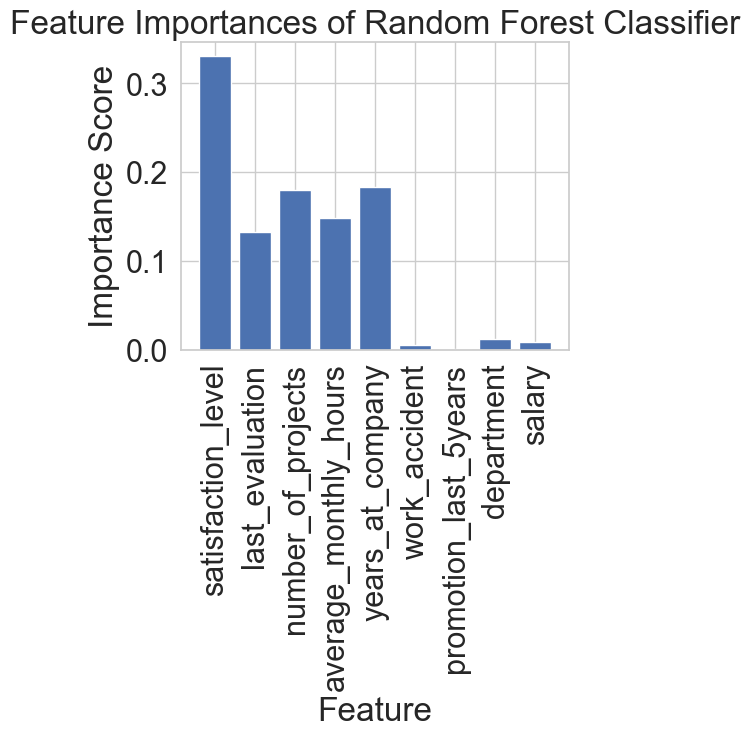

In [68]:
import matplotlib.pyplot as plt

# get feature importances
importance_scores = rfc.feature_importances_

# get feature names
feature_names = list(X_train.columns)

# create a bar chart of feature importances
plt.figure(figsize=(5,4))
plt.bar(range(len(importance_scores)), importance_scores)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances of Random Forest Classifier")
plt.show()


In [69]:
X_train.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
1218,0.42,0.56,2,146,3,0,0,9,1
2728,0.55,0.49,3,152,2,0,0,3,2
6464,0.67,0.97,5,239,3,0,0,4,1
11187,0.49,0.91,4,134,4,0,0,1,1
5743,0.95,0.68,5,225,3,0,0,0,2


In [70]:
features.head(2)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,0,1
1,0.80,0.86,5,262,6,0,0,0,2


In [71]:
features['salary'].value_counts()

salary
1    7316
2    6446
0    1237
Name: count, dtype: int64

In [72]:
target.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [73]:
import pickle
pickle.dump(rfc, open('final_prediction.pickle', 'wb'))

In [74]:
model=pd.read_csv("text.csv")

In [75]:
model

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
0,0.380,0.53,2,157,3,0,0,sales,low
1,0.280,0.86,5,262,6,0,0,sales,medium
2,0.110,0.88,7,272,4,0,0,sales,medium
3,0.720,0.87,5,223,5,0,0,sales,low
4,0.341,0.46,2,128,3,0,0,accounting,low
...,...,...,...,...,...,...,...,...,...
73,0.390,0.47,2,152,3,0,0,marketing,medium
74,0.440,0.51,2,146,3,0,0,marketing,medium
75,0.100,0.84,6,253,4,0,0,marketing,medium
76,0.790,0.94,5,227,6,0,0,sales,medium


In [77]:
lb=LabelEncoder()
model['department']=lb.fit_transform(model['department'])
model['salary']=lb.fit_transform(model['salary'])

In [78]:
model_pred=rfc.predict(model)

In [79]:
print(model_pred)

[1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1]


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
x_tra,x_tes,y_tra,y_tes=train_test_split(features,target,test_size=0.4,stratify=target)
model=LogisticRegression(max_iter=1000,solver='saga',C=1.0)
model.fit(x_tra,y_tra)
pre=model.predict(x_tes)
accuracy=accuracy_score(y_tes,pre)
print(f'Accuracy:{accuracy:.2f}')

Accuracy:0.78


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
